<a href="https://colab.research.google.com/github/tanushkapatil/DEVL/blob/main/assignment_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 1. Handling Missing Values
# If there are missing values, fill them with the column mean for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 2. Removing Duplicates
df.drop_duplicates(inplace=True)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 3. Removing Outliers using the IQR method
# Function to remove outliers from numeric columns
def remove_outliers_iqr(df):
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    # Remove rows where any value is below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
    df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

# Applying the function to remove outliers
df_cleaned = remove_outliers_iqr(df)
df_cleaned


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


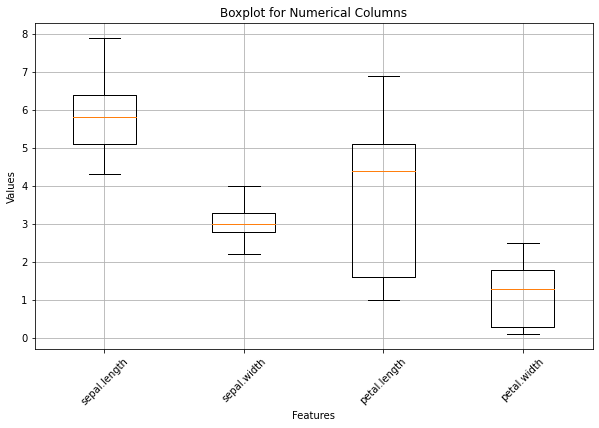

In [ ]:
import matplotlib.pyplot as plt

# Define numeric columns in the DataFrame
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_cleaned[col] for col in numeric_cols], labels=numeric_cols)
plt.title('Boxplot for Numerical Columns')
plt.xlabel('Features')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.xticks(rotation=45)  # Rotate column names for better visibility
plt.grid(True)
plt.show()


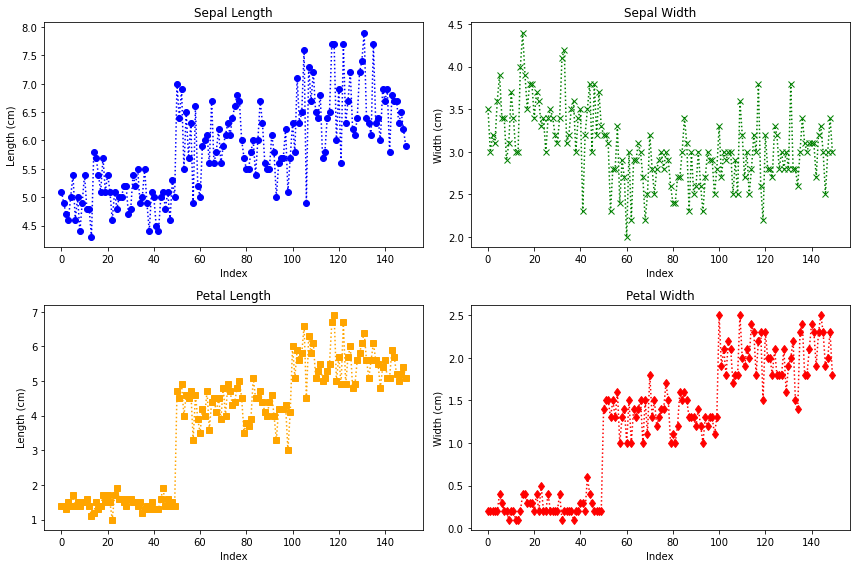

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

# Create subplots for each feature
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

# Plot Sepal Length
axs[0, 0].plot(iris['sepal.length'], linestyle='dotted', marker='o', color='blue')
axs[0, 0].set_title('Sepal Length')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Length (cm)')

# Plot Sepal Width
axs[0, 1].plot(iris['sepal.width'], linestyle='dotted', marker='x', color='green')
axs[0, 1].set_title('Sepal Width')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Width (cm)')

# Plot Petal Length
axs[1, 0].plot(iris['petal.length'], linestyle='dotted', marker='s', color='orange')
axs[1, 0].set_title('Petal Length')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Length (cm)')

# Plot Petal Width
axs[1, 1].plot(iris['petal.width'], linestyle='dotted', marker='d', color='red')
axs[1, 1].set_title('Petal Width')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Width (cm)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




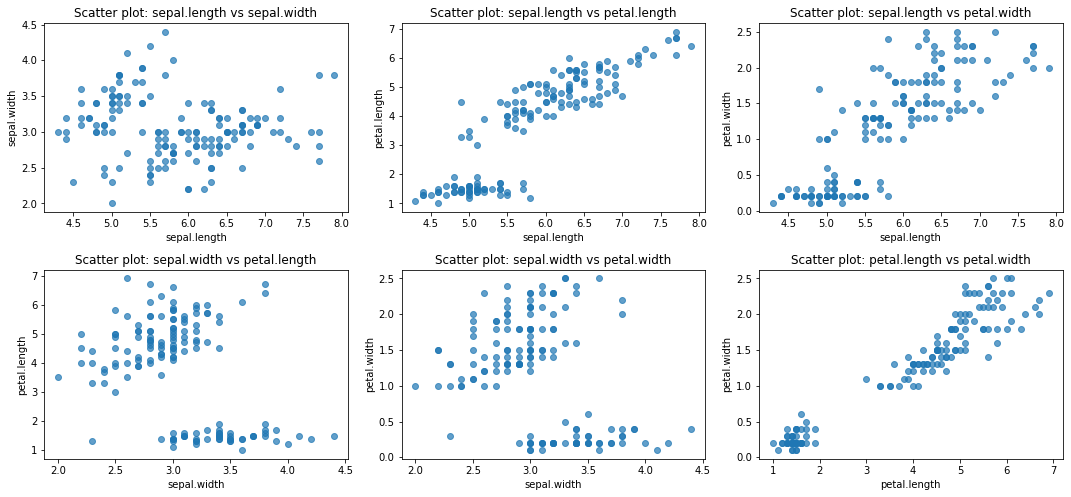

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns  # Select numeric columns
plt.figure(figsize=(15, 10))  # Adjust the figure size for better visibility
plot_number = 1

# Nested loops to plot all pairs of numeric columns
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):  # Ensure no repeat and no plotting the same column against itself
        plt.subplot(3, 3, plot_number)  # Create a grid for subplots (3 rows and 3 columns)
        plt.scatter(df[numeric_cols[i]], df[numeric_cols[j]], alpha=0.7)
        plt.title(f'Scatter plot: {numeric_cols[i]} vs {numeric_cols[j]}')
        plt.xlabel(numeric_cols[i])
        plt.ylabel(numeric_cols[j])
        plot_number += 1

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



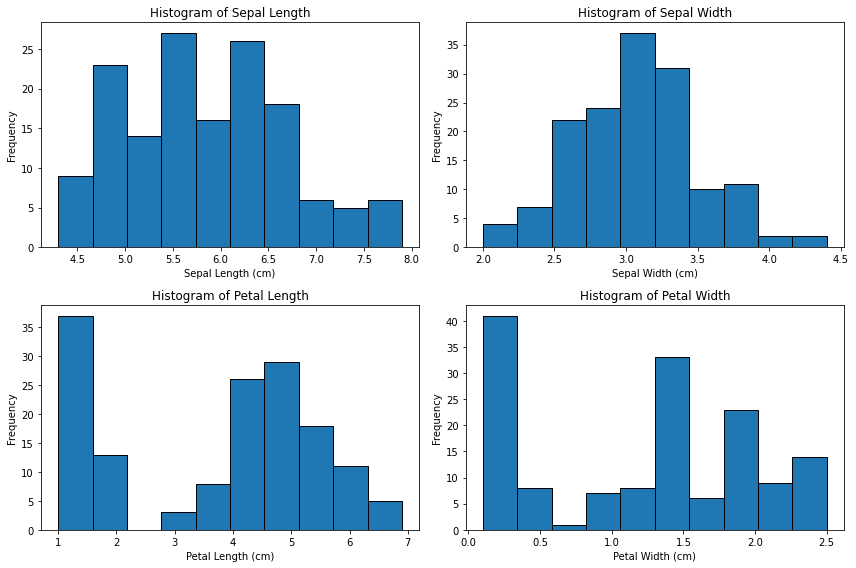

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

# Histogram for Sepal Length
axs[0, 0].hist(iris['sepal.length'], bins=10, edgecolor='black')
axs[0, 0].set_title('Histogram of Sepal Length')
axs[0, 0].set_xlabel('Sepal Length (cm)')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Sepal Width
axs[0, 1].hist(iris['sepal.width'], bins=10, edgecolor='black')
axs[0, 1].set_title('Histogram of Sepal Width')
axs[0, 1].set_xlabel('Sepal Width (cm)')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Petal Length
axs[1, 0].hist(iris['petal.length'], bins=10, edgecolor='black')
axs[1, 0].set_title('Histogram of Petal Length')
axs[1, 0].set_xlabel('Petal Length (cm)')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Petal Width
axs[1, 1].hist(iris['petal.width'], bins=10, edgecolor='black')
axs[1, 1].set_title('Histogram of Petal Width')
axs[1, 1].set_xlabel('Petal Width (cm)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


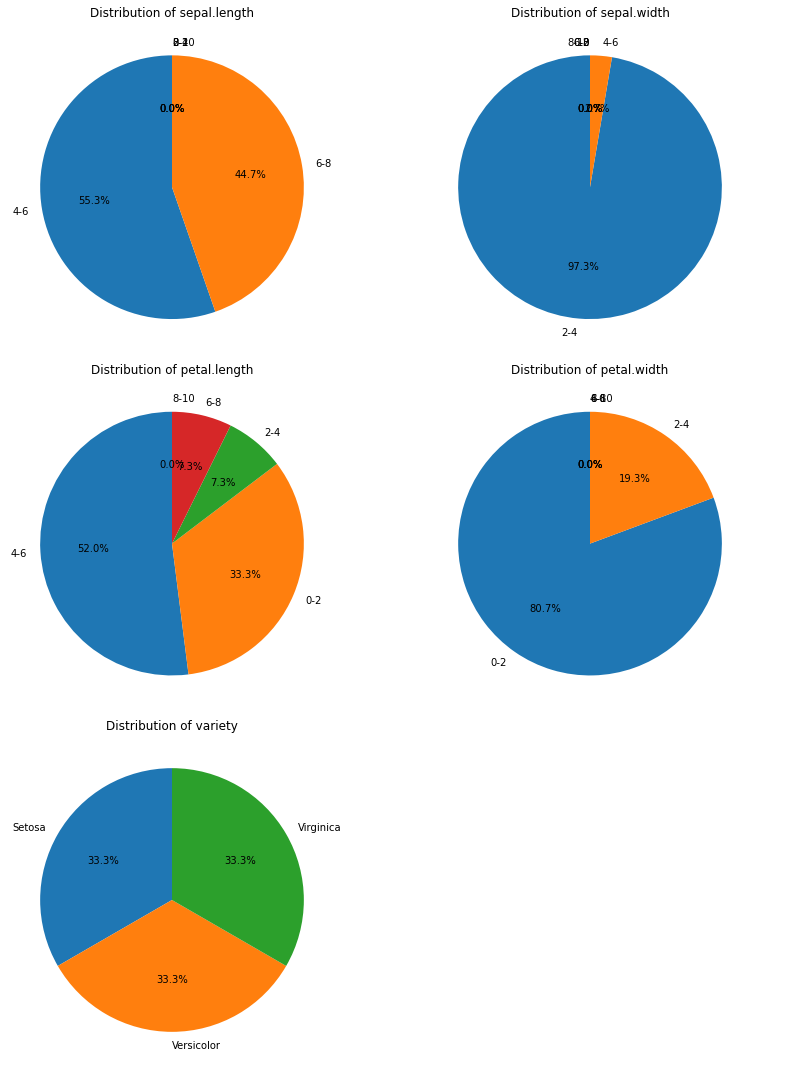

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

# Define a function to create pie charts for a given column
def create_pie_chart(data, column, ax):
    if column == 'variety':  # Categorical column (species)
        # Count occurrences of each species
        counts = data[column].value_counts()
    else:
        # Create bins for the continuous variable
        bins = [0, 2, 4, 6, 8, 10]  # Define bin edges
        labels = ['0-2', '2-4', '4-6', '6-8', '8-10']  # Bin labels
        binned_data = pd.cut(data[column], bins=bins, labels=labels, right=False)
        counts = binned_data.value_counts()

    # Create a pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {column}')

# Create subplots for each pie chart
fig, axs = plt.subplots(3, 2, figsize=(12, 15))  # 3x2 grid

# Create pie charts for each feature
create_pie_chart(iris, 'sepal.length', axs[0, 0])
create_pie_chart(iris, 'sepal.width', axs[0, 1])
create_pie_chart(iris, 'petal.length', axs[1, 0])
create_pie_chart(iris, 'petal.width', axs[1, 1])
create_pie_chart(iris, 'variety', axs[2, 0])  # Add pie chart for species

# Hide the last subplot as it's not used
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()



/home/pccoe/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


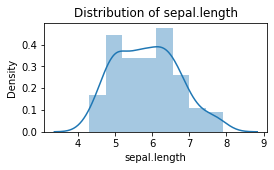

/home/pccoe/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


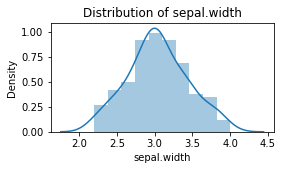

/home/pccoe/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


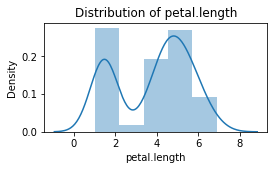

/home/pccoe/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


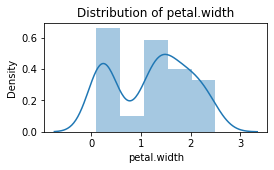

In [ ]:
import seaborn as sns
# Visualization using distplot for each numeric column
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(4, 2))
    sns.distplot(df_cleaned[column])  # kde=True adds the kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.show()

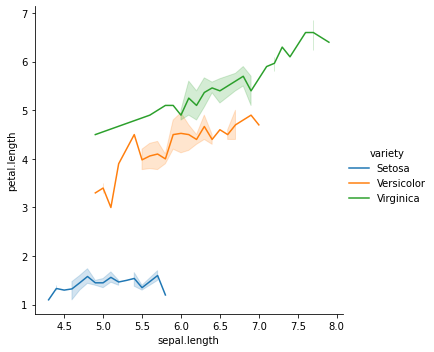

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset using pandas
iris = pd.read_csv("iris.csv")

# Create a line plot using Seaborn's relplot
sns.relplot(
    data=iris, kind="line",
    x="sepal.length", y="petal.length", hue="variety",
    markers=True, dashes=False  # Optional: to make it more distinguishable
)

# Show the plot
plt.show()
